# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 =\mathbb{E}(aX - (X - \epsilon))^2 = \mathbb{E}((a-1)X - \epsilon)^2 =$$ \mathbb{E}((a-1)^2 *X^2 - 2*(a-1)\epsilon*X + (\epsilon)^2)^2 =$$ \mathbb{E}((a-1)^2 *X^2) -
\mathbb{E}(2*(a-1)\epsilon*X) + \mathbb{E}(\epsilon)^2 = (a-1)^2 * \mathbb{E}(X^2) + 0 + 
\mathbb{E}((\epsilon)^2) = (a-1)^2 + \sigma^2$,

In our task we know $a^* = 1$.

In [2]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

In [3]:
population_risk(1, 0.1)

0.010000000000000002

### b)

In [4]:
import numpy as np

In [5]:
# sampling
n = 50
sigma_sq = 1
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, sigma_sq, n)
Y = X + epsilon

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [6]:
def empirical_risk(a, x, y):
    return np.sum(((a*x - y)**2))/ len(x)

In [7]:
empirical_risk(1, X, Y)

0.8935049695880806

### c)

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
x_line = np.arange(0, 2.01, 0.01)

In [10]:
y_pop = population_risk(x_line, sigma_sq) 

In [11]:
y_emp = []
for a in x_line:
    y_emp.append(empirical_risk(a, X, Y))

In [12]:
mod_a = LinearRegression()
mod_a.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

LinearRegression()

In [13]:
a_emp = mod_a.coef_[0][0]

In [14]:
emp_min = empirical_risk(a_emp, X, Y)

In [15]:
pop_min = population_risk(a_emp, 1)

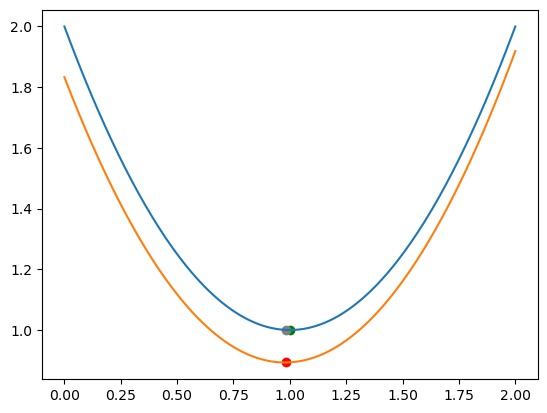

In [16]:
plt.plot(x_line, y_pop)
plt.plot(x_line, y_emp)
plt.scatter(a_emp, emp_min, c='red')
plt.scatter(1,1, c='green')
plt.scatter(a_emp, pop_min, c='grey')

# d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [17]:
#excess risk
population_risk(a_emp, 1) - 1

0.000346943701514002

In [18]:
# simulations with fixed sample size
L = 200
excess_risk = []
n = 50
sigma_sq = 1

for i in range(L):
    X = np.random.normal(0, 1, n)
    epsilon = np.random.normal(0, sigma_sq, n)
    Y = X + epsilon
    mod = LinearRegression()
    mod.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    a_emp = mod.coef_[0][0]
    excess_risk.append(population_risk(a_emp, 1) - 1)

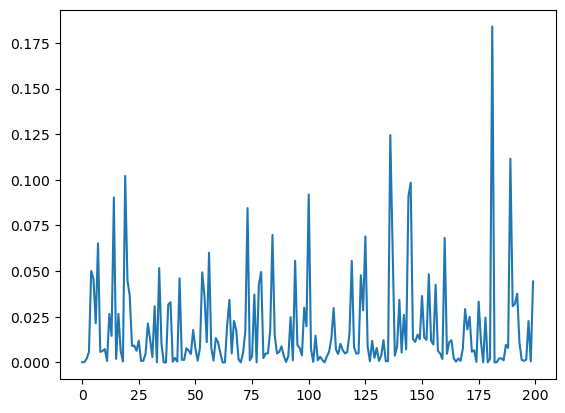

In [19]:
plt.plot(excess_risk)

In [20]:
np.mean(excess_risk)

0.018537042306092058

In [27]:
# simulations for various sample sizes
mean_excess_risk = []
n = 200
sigma_sq = 1
for L in range(100, 10000, 500):
    excess_risk = []
    for i in range(L):
        X = np.random.normal(0, 1, L)
        epsilon = np.random.normal(0, sigma_sq, L)
        Y = X + epsilon
        mod = LinearRegression(fit_intercept=False)
        mod.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
        a_emp = mod.coef_[0][0]
        excess_risk.append(population_risk(a_emp, 1) - 1)
    mean_excess_risk.append(np.mean(excess_risk))

In [28]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
x_line = range(100, 10000, 500)

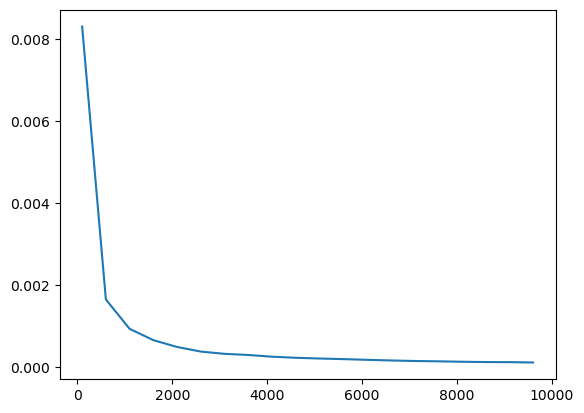

In [29]:
plt.plot(x_line, mean_excess_risk)